In [ ]:
##Modelo de prediccion de precios de casas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/DarthShadow147/DiplomadoCienciaDatos/master/App/DataAccess/kc_house_data.csv')

In [4]:
data.head() #CSV cargado

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
data_features = list(data.columns)
data_features.remove("sqft_basement") ##Se quita "sqft_basement" para realizar diagramas de dispersion ya que con este tipo de obj no se puede trazar
print(data_features)

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


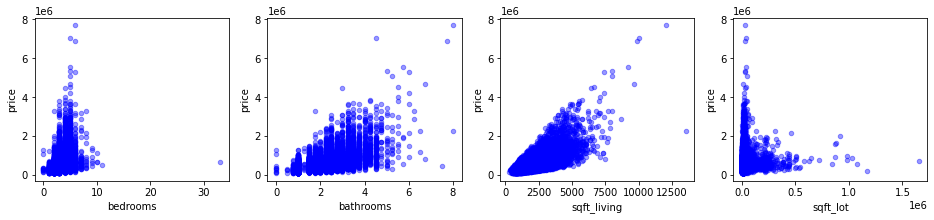

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(data_features)[3:7], axes):
    data.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

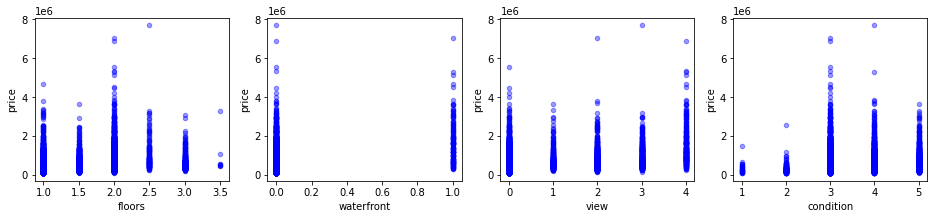

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(data_features)[7:11], axes):
    data.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

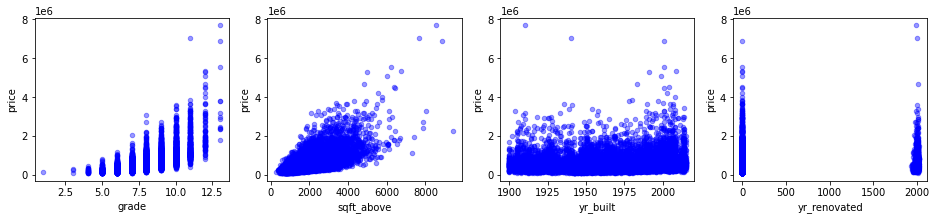

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(data_features)[11:15], axes):
    data.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

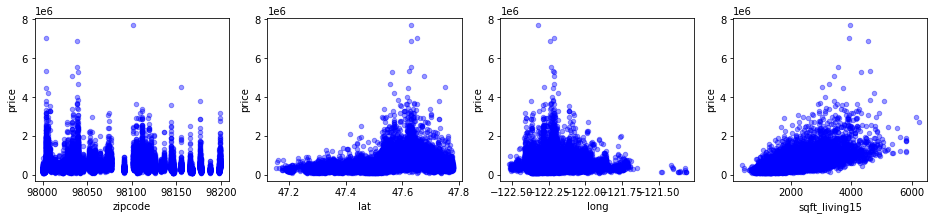

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(data_features)[15:20], axes):
    data.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

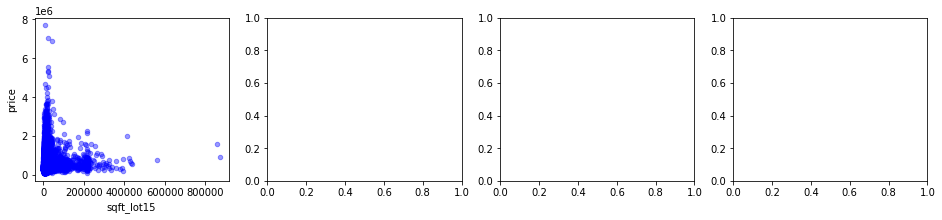

In [25]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
for xcol, ax in zip(list(data_features)[19:22], axes):
    data.plot(kind='scatter', x= xcol, y="price", ax=ax, alpha=0.4, color='b')

In [27]:
data.price.describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

<AxesSubplot:>

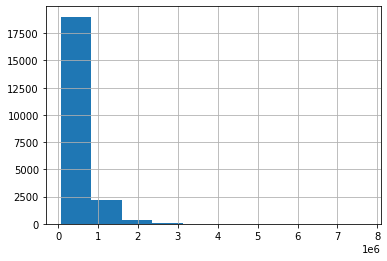

In [29]:
data.price.hist()

In [30]:
data.bedrooms.unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

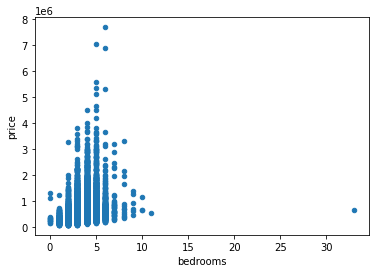

In [31]:
data.plot(kind='scatter',x= "bedrooms", y="price" )

In [32]:
data.bedrooms.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [33]:
data.loc[data["bedrooms"] == 33] ## Caso atipico, una casa con tantas habitaciones deberia tener mas baños

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [35]:
data["bedrooms"] = data["bedrooms"].drop(data["bedrooms"].idxmax()) # Se obtiene el indice maximo, y se elimina el valor maximo de dormitorios

In [36]:
data.bathrooms.unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

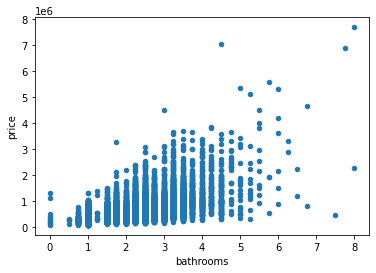

In [37]:
data.plot(kind='scatter',x= "bathrooms", y="price" )

<AxesSubplot:>

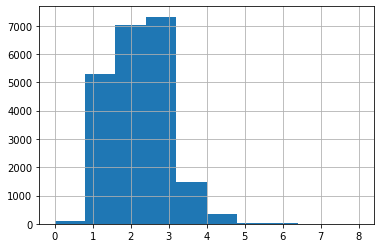

In [38]:
data.bathrooms.hist()

In [39]:
data.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [40]:
data[data.bathrooms == 8]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6.0,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7.0,8.0,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [41]:
data.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [42]:
data.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [43]:
data.floors.describe()

count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

<AxesSubplot:>

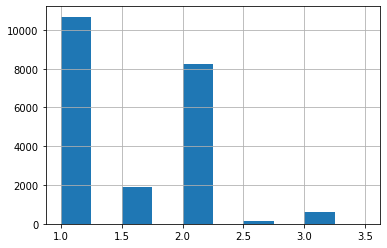

In [44]:
data.floors.hist()

<AxesSubplot:xlabel='floors', ylabel='price'>

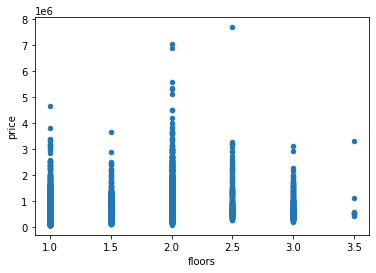

In [45]:
data.plot(kind='scatter',x= "floors", y="price" )

In [46]:
#Se crea un arreglo segun los valores observados en el grafico anterior
bins = [0, 1.0 , 1.5, 2.0, 2.5, 3.0, 3.5]
bins_floors = pd.cut(data['floors'], bins)
#Se organizan por intervalos
bins_floors = bins_floors.cat.as_unordered()
bins_floors.head()

0    (0.0, 1.0]
1    (1.5, 2.0]
2    (0.0, 1.0]
3    (0.0, 1.0]
4    (0.0, 1.0]
Name: floors, dtype: category
Categories (6, interval[float64, right]): [(0.0, 1.0], (1.0, 1.5], (1.5, 2.0], (2.0, 2.5], (2.5, 3.0], (3.0, 3.5]]

In [47]:
bins_floors.value_counts()

(0.0, 1.0]    10680
(1.5, 2.0]     8241
(1.0, 1.5]     1910
(2.5, 3.0]      613
(2.0, 2.5]      161
(3.0, 3.5]        8
Name: floors, dtype: int64

<AxesSubplot:>

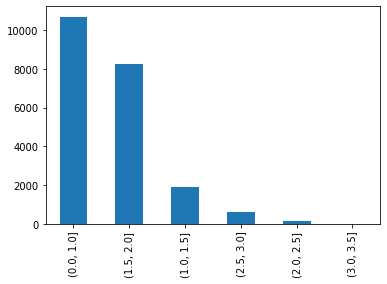

In [48]:
bins_floors.value_counts().plot(kind='bar')

In [49]:
data.floors.unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

In [50]:
data.waterfront.describe()

count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [51]:
data.waterfront.unique() ##Vista al agua ya esta catergorizado como binario

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='waterfront', ylabel='price'>

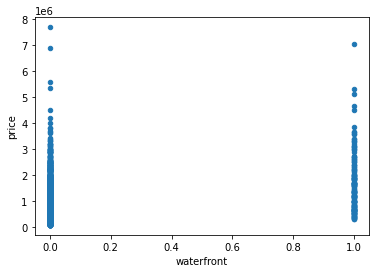

In [54]:
data.plot(kind='scatter',x= "waterfront", y="price" ) # Diagrama de dispersion de la relacion frente al agua con el precio

In [55]:
data[data.waterfront == 0].describe() #Se verifican las casas que no tengan vista al agua

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.145000e+04,2.145000e+04,21448.000000,21450.000000,21450.000000,2.145000e+04,21450.000000,21450.0,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000,21450.000000
mean,4.580984e+09,5.315636e+05,3.369638,2.110478,2071.587972,1.502896e+04,1.493193,0.0,0.207459,3.408485,7.648392,1783.187972,288.400000,1971.072121,81.149930,98077.798555,47.560225,-122.213382,1981.386667,12695.378089
std,2.876647e+09,3.415996e+05,0.905100,0.765648,906.257233,4.140001e+04,0.539740,0.0,0.702686,0.649952,1.165861,822.031116,437.413797,29.374981,394.235173,53.431956,0.138712,0.140826,681.669886,27324.378859
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.0,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.124049e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.032250e+03,1.000000,0.0,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.471300,-122.328000,1480.000000,5100.000000
50%,3.904935e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.588500e+03,1.500000,0.0,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572000,-122.229000,1830.000000,7600.000000
75%,7.305750e+09,6.398970e+05,4.000000,2.500000,2540.000000,1.057600e+04,2.000000,0.0,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98117.000000,47.678200,-122.125000,2350.000000,10020.750000
max,9.900000e+09,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,0.0,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [56]:
data[data.waterfront == 1].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000,163.000000,163.000000,163.0,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,4.490512e+09,1.661876e+06,3.300613,2.677914,3173.687117,25371.828221,1.641104,1.0,3.766871,3.533742,8.773006,2473.042945,700.644172,1962.190184,512.392638,98096.527607,47.537364,-122.281601,2666.349693,22385.104294
std,2.873261e+09,1.120372e+06,1.078035,1.092456,1606.025093,42944.334119,0.554191,0.0,0.561859,0.739388,1.761385,1240.439072,792.919972,27.877056,872.405490,59.705586,0.115622,0.124015,823.243364,22589.013566
min,1.210290e+08,2.850000e+05,1.000000,0.750000,440.000000,1767.000000,1.000000,1.0,1.000000,1.000000,5.000000,440.000000,0.000000,1903.000000,0.000000,98004.000000,47.327600,-122.514000,750.000000,2433.000000
25%,2.013802e+09,7.600000e+05,3.000000,2.000000,2060.000000,10851.000000,1.000000,1.0,4.000000,3.000000,8.000000,1570.000000,0.000000,1940.500000,0.000000,98040.000000,47.451200,-122.376500,2080.000000,11715.000000
50%,3.761100e+09,1.400000e+06,3.000000,2.500000,2850.000000,17342.000000,2.000000,1.0,4.000000,3.000000,9.000000,2180.000000,500.000000,1960.000000,0.000000,98075.000000,47.539500,-122.277000,2660.000000,15959.000000
75%,7.377700e+09,2.215000e+06,4.000000,3.250000,3905.000000,26408.000000,2.000000,1.0,4.000000,4.000000,10.000000,3085.000000,1245.000000,1986.500000,1959.000000,98155.000000,47.606800,-122.210000,3140.000000,24765.000000
max,9.808701e+09,7.062500e+06,6.000000,6.750000,10040.000000,505166.000000,3.000000,1.0,4.000000,5.000000,12.000000,7680.000000,4820.000000,2014.000000,2009.000000,98199.000000,47.772900,-122.059000,4913.000000,192268.000000


In [57]:
data.view.unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [59]:
data.view.describe()

count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

<AxesSubplot:>

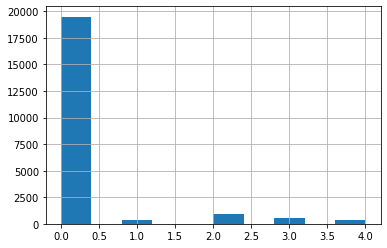

In [60]:
data.view.hist()

In [61]:
data.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

In [65]:
nullcount = data.view.isna().sum() # Se verifica que no existan valores nulos 
nullcount
nullcount/data.view.count() * 100

0.0

<AxesSubplot:xlabel='view', ylabel='price'>

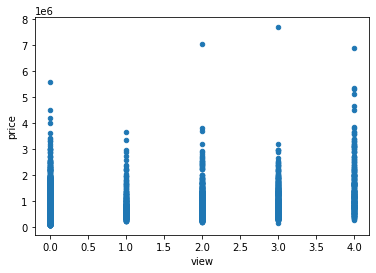

In [66]:
data.plot(kind='scatter',x= "view", y="price" )

In [72]:
# La columna "Condition" describe que tan buena es la condicion de la casa en terminos generales
data.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [73]:
data.condition.describe() 

count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

<AxesSubplot:>

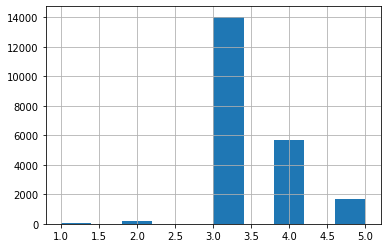

In [74]:
data.condition.hist()

In [75]:
data.drop(["condition"], axis = 1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,0,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,0,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,0,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,0,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
## Para este modelo se utilizara la columna "Grade" que describe la calificacion general otorgada a la unidad de vivienda en
## King Coutry

In [76]:
data.grade.describe()

count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64

<AxesSubplot:>

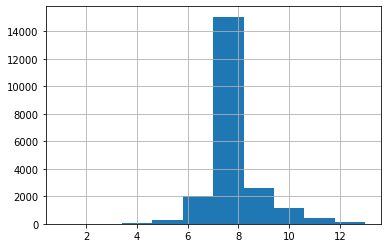

In [77]:
data.grade.hist() 

In [78]:
data.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1], dtype=int64)

In [79]:
data.grade.value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='price'>

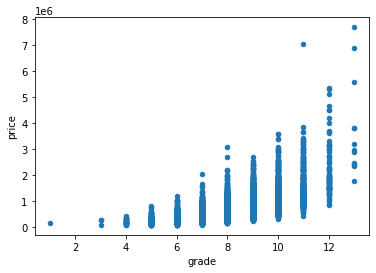

In [80]:
data.plot(kind='scatter',x= "grade", y="price" ) 

In [81]:
data.yr_renovated.unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944], dtype=int64)

In [82]:
data.yr_renovated.describe()

count    21613.000000
mean        84.402258
std        401.679240
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

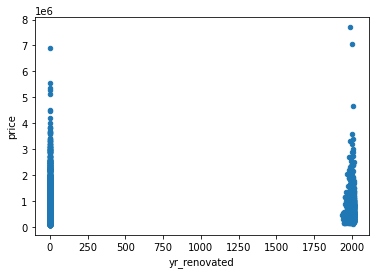

In [83]:
data.plot(kind='scatter',x= "yr_renovated", y="price" )

In [87]:
data[data.yr_renovated == 0].describe() 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.069900e+04,2.069900e+04,20698.000000,20699.000000,20699.000000,2.069900e+04,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000,20699.0,20699.000000,20699.000000,20699.000000,20699.000000,20699.000000
mean,4.590543e+09,5.303608e+05,3.365784,2.106624,2069.267066,1.503956e+04,1.493599,0.005846,0.217547,3.417653,7.653413,1784.357505,284.909561,1972.395092,0.0,98077.216484,47.559198,-122.211873,1986.949321,12723.012851
std,2.875468e+09,3.495780e+05,0.901531,0.763414,909.007322,4.156361e+04,0.541892,0.076235,0.735454,0.654721,1.174042,826.962469,436.489065,28.855465,0.0,53.337708,0.139170,0.140882,684.559825,27322.918404
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.0,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.050000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1953.000000,0.0,98032.000000,47.468300,-122.326000,1490.000000,5100.000000
50%,3.904990e+09,4.480000e+05,3.000000,2.250000,1900.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1550.000000,0.000000,1977.000000,0.0,98065.000000,47.570400,-122.226000,1840.000000,7622.000000
75%,7.334401e+09,6.344000e+05,4.000000,2.500000,2530.000000,1.060950e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,540.000000,1998.000000,0.0,98117.000000,47.678300,-122.123000,2360.000000,10050.000000
max,9.900000e+09,6.885000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,0.0,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [88]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [89]:
data.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

<AxesSubplot:xlabel='zipcode', ylabel='price'>

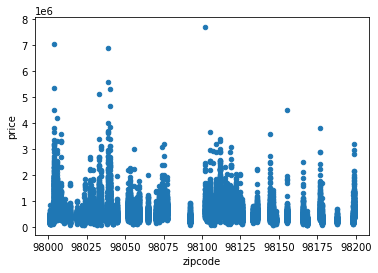

In [90]:
data.plot(kind='scatter',x= "zipcode", y="price" )

In [91]:
data.zipcode = data.zipcode.astype("str") # Conversion de Codigo postal a string
## El codigo postal se usara como string en este modelo ya que es un tipo categorico

In [92]:
data.dtypes ## Se revisan que las columnas hayan sido convertidas a los valores necesitados

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [93]:
data.lat.unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

In [94]:
data.lat.describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

<AxesSubplot:>

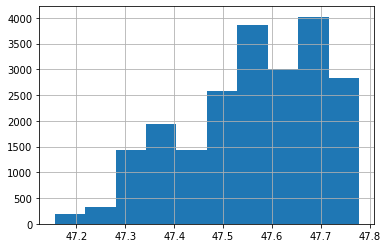

In [95]:
data.lat.hist()

<AxesSubplot:xlabel='lat', ylabel='price'>

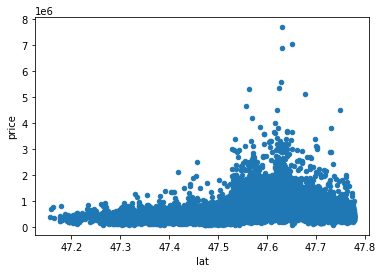

In [96]:
data.plot(kind='scatter',x= "lat", y="price")

In [97]:
len(data.long.unique())

752

<AxesSubplot:>

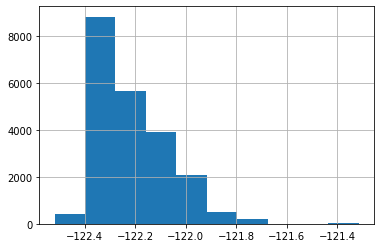

In [98]:
data.long.hist()

<AxesSubplot:xlabel='long', ylabel='price'>

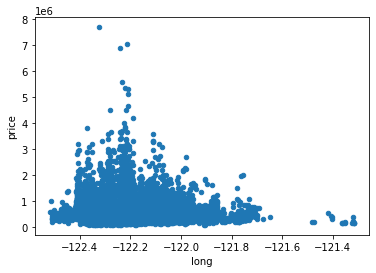

In [99]:
data.plot(kind='scatter',x= "long", y="price" )

In [100]:
len(data.sqft_living15.unique())

777

In [101]:
data.sqft_living15.describe()

count    21613.000000
mean      1986.552492
std        685.391304
min        399.000000
25%       1490.000000
50%       1840.000000
75%       2360.000000
max       6210.000000
Name: sqft_living15, dtype: float64

<AxesSubplot:>

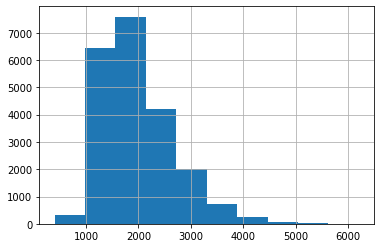

In [102]:
data.sqft_living15.hist()

In [103]:
data.sqft_lot15.unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007], dtype=int64)

In [105]:
data[data.sqft_lot15 == 0] ## No existen datos en 0

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21611 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

In [107]:
len(data.sqft_above.unique())  

946

In [108]:
data.sqft_above.describe()

count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

<AxesSubplot:>

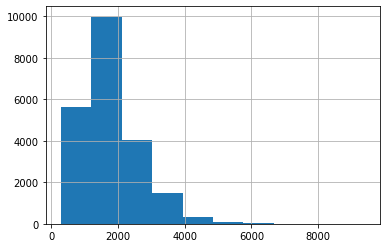

In [109]:
data.sqft_above.hist()

In [110]:
(data.sqft_above.max() - data.sqft_above.mean()) //data.sqft_above.std() 
#Los pies cuadrado por encima del valor maximo es un valor atipico

9.0

In [112]:
data.sqft_basement.describe()

count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [113]:
len(data.sqft_basement.unique())

306

<AxesSubplot:>

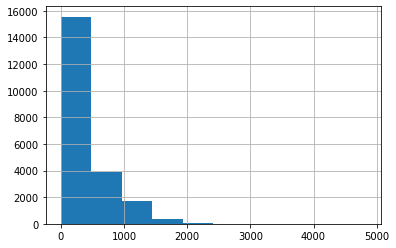

In [114]:
data.sqft_basement.hist()

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21611 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  object 
 17  lat            21613 non-null  float64
 18  long  

<AxesSubplot:>

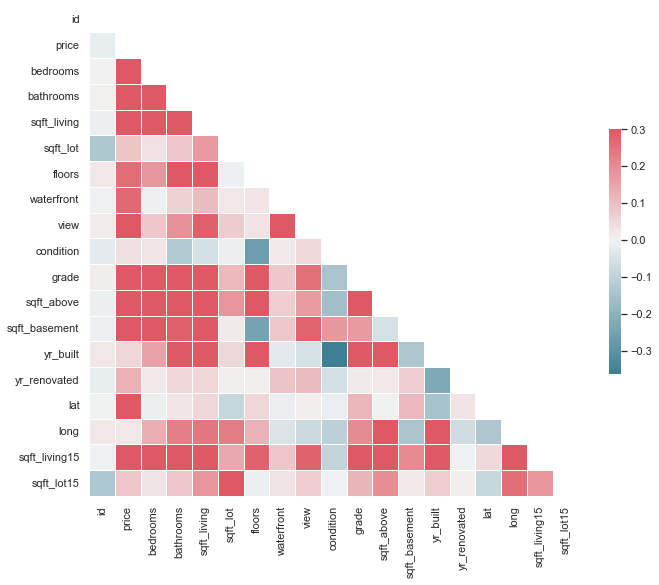

In [125]:
#Matriz de correlacion

sns.set(style="white")
corr = data.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

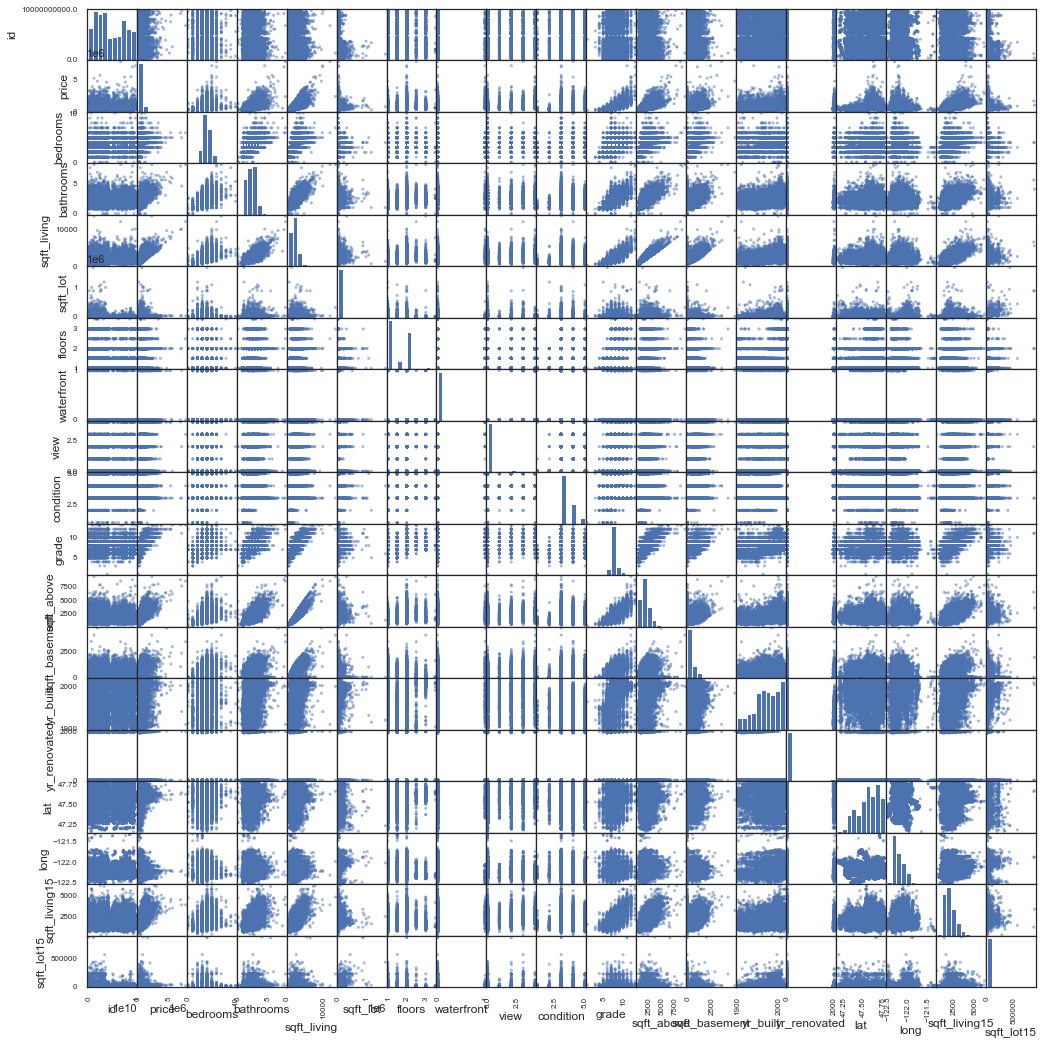

In [126]:
correlation_df = data 
pd.plotting.scatter_matrix(correlation_df,figsize  = [17, 18]);
## Se usa pandas para generar diagramas de dispersion y detectar relaciones lineales por pares

In [127]:
correlation_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.002845,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.315983,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447
bedrooms,0.002845,0.315983,1.000000,0.529594,0.592060,0.032956,0.181020,-0.006588,0.082183,0.025765,0.367323,0.491122,0.309729,0.160143,0.017802,-0.010547,0.134518,0.403613,0.030564
bathrooms,0.005160,0.525138,0.529594,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.592060,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.032956,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.181020,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006588,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.082183,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.025765,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406


In [128]:
abs(correlation_df.corr()) > 0.75 

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


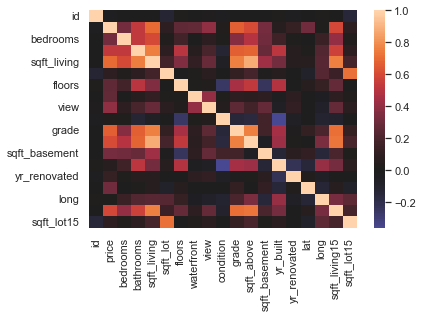

In [129]:
sns.heatmap(correlation_df.corr(), center=0);
## Escalado y normalizacion de caracteristicas